# Анализ личных трат

In [436]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [437]:
category_names = [
     'мясное',
 'выпечка',
 'молочка',
 'напитки',
 'сладости',
 'гарнир',
 'химия',
 'готовое блюдо из магазина',
 'Дополнения к основным блюдам',
 'зелень',
]

In [438]:
files = os.listdir("categories")

df = pd.DataFrame()

for filename in files:
    new_df = pd.read_csv(f"categories/{filename}",index_col=0)
    df = pd.concat(
        [df,new_df],axis=0,ignore_index=True
    )

In [439]:
df['date_str'] = df['date'].astype('str')
df['date'] = df['date'].astype('datetime64[ns]')
df['label'] = df['label'].astype('category')


In [440]:
df['wprice'] = df['quantity'] * df['price'] /100

In [441]:
sum_per_day= df[['date','wprice']].groupby('date').sum()

In [442]:
sum_per_day = sum_per_day.reset_index()
sum_per_day['date_str'] = sum_per_day['date'].astype('str')

График покупок по дням 

In [443]:
sum_per_day

,date,wprice,date_str
0,2021-01-06,6521.31546,2021-01-06
1,2021-01-09,1087.19085,2021-01-09
2,2021-01-15,10284.22710,2021-01-15
3,2021-01-30,9539.19094,2021-01-30
4,2021-02-06,7413.76543,2021-02-06
5,2021-02-14,7331.90397,2021-02-14
6,2021-02-19,7298.59210,2021-02-19
7,2021-02-23,188.98000,2021-02-23
8,2021-02-26,6209.99778,2021-02-26
9,2021-03-03,318.94000,2021-03-03


<AxesSubplot:xlabel='date_str'>

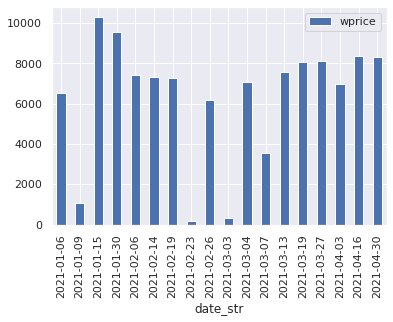

In [444]:
sum_per_day.plot.bar(x='date_str',y='wprice')

2021-01-15 и 2021-01-30 были крупные покупки, посмотрим

Топ 10 покупок за 2021-01-15

In [445]:
df[df['date']=='2021-01-15'].sort_values(by='wprice',ascending=False).head(10)

,name,price,sum,quantity,paymentType,productType,nds,ndsSum,date,label,clr_name,date_str,wprice
400,"ГРЕМИСЕУЛИ 7ЛЕТ 0,5Л",124999,124999,1.000,4,1,1,20833,2021-01-15,6.0,гремисеули лет л,2021-01-15,1249.99000
595,ТРЕСКА ФИЛЕ ЗАМ,43999,38191,0.868,4,1,2,3472,2021-01-15,0.0,треска филе зам,2021-01-15,381.91132
33,КОН КОРК МОЛ/ТЁМ192,34999,34999,1.000,4,1,1,5833,2021-01-15,4.0,кон корк мол/тём,2021-01-15,349.99000
602,ФАРШ ИЗ ПОСТНОЙ СВИН,38990,33843,0.868,4,1,2,3077,2021-01-15,0.0,фарш из постной свин,2021-01-15,338.43320
398,ФУТБОЛКА ЖЕН НАБИВКА,30000,30000,1.000,4,1,1,5000,2021-01-15,6.0,футболка жен набивка,2021-01-15,300.00000
599,ФАРШ ИЗ ПОСТНОЙ СВИН,38990,29204,0.749,4,1,2,2655,2021-01-15,0.0,фарш из постной свин,2021-01-15,292.03510
597,ФИЛЕ ГРУДКИ ОХЛ ВЕС,27999,26879,0.960,4,1,2,2444,2021-01-15,0.0,филе грудки охл вес,2021-01-15,268.79040
276,"ЧАЙ ТЕСС ЧЕР100*1,8Г",26699,26699,1.000,4,1,1,4450,2021-01-15,3.0,чай тесс чер г,2021-01-15,266.99000
201,МАНДАРИНЫ МАРОККО ФА,16999,25261,1.486,4,1,2,2296,2021-01-15,10.0,мандарины марокко фа,2021-01-15,252.60514
277,"ВОДА ШИШ ЛЕС 1,75 Л",1999,23988,12.000,4,1,1,3998,2021-01-15,3.0,вода шиш лес л,2021-01-15,239.88000


Топ 10 покупок за 2021-01-30

In [446]:
df[df['date']=='2021-01-30'].sort_values(by='wprice',ascending=False).head(10)

,name,price,sum,quantity,paymentType,productType,nds,ndsSum,date,label,clr_name,date_str,wprice
536,ХОЛОДЕЦ ИЗ СВИНИНЫ,31990,61229,1.914,4,1,2,5566,2021-01-30,0.0,холодец из свинины,2021-01-30,612.28860
363,КР Д/В ПЕРФ МУС ЛЕСН,43999,43999,1.000,4,1,1,7333,2021-01-30,6.0,кр д/в перф мус лесн,2021-01-30,439.99000
551,КУР. ОКОРОЧКА ГРИЛЬ,35990,31311,0.870,4,1,2,2846,2021-01-30,0.0,кур окорочка гриль,2021-01-30,313.11300
137,ОГУРЦЫ 1800Г,29999,29999,1.000,4,1,1,5000,2021-01-30,10.0,огурцы г,2021-01-30,299.99000
540,ФАРШ ИЗ ПОСТНОЙ СВИН,34990,29846,0.853,4,1,2,2713,2021-01-30,0.0,фарш из постной свин,2021-01-30,298.46470
143,ЦЫПЛЕН ОХЛ ПАКЕТ ВЕС,15999,28606,1.788,4,1,2,2601,2021-01-30,10.0,цыплен охл пакет вес,2021-01-30,286.06212
541,ФАРШ ИЗ ПОСТНОЙ СВИН,34990,26033,0.744,4,1,2,2367,2021-01-30,0.0,фарш из постной свин,2021-01-30,260.32560
269,"ВОДА ШИШ ЛЕС 1,75 Л",1999,23988,12.000,4,1,1,3998,2021-01-30,3.0,вода шиш лес л,2021-01-30,239.88000
539,КОЛБАСА КРАКОВСК П/К,45990,23271,0.506,4,1,2,2116,2021-01-30,0.0,колбаса краковск п/к,2021-01-30,232.70940
548,АЗУ ИНД.ОХЛ 500Г,22999,22999,1.000,4,1,2,2091,2021-01-30,0.0,азу инд охл г,2021-01-30,229.99000


Посмотрим на мясные продукты

In [447]:
meat = df[df.label==0]

In [448]:
meat[['clr_name','wprice']].groupby('clr_name').sum().head(60)

,wprice
clr_name,
азу из индейки г,249.99000
азу из мяса инд г,215.99000
азу инд охл г,1446.93000
бедро кур охл вес,597.43620
бедро охл лот вес,112.27198
голень индейки вес,445.28594
горбуша б/г зам вес,1260.25428
грудинка деликатесна,418.22720
грудка кур глобус,177.40215


Любимые виды мяса
- Индейка
- Свинина
- Курица

<AxesSubplot:xlabel='date_str'>

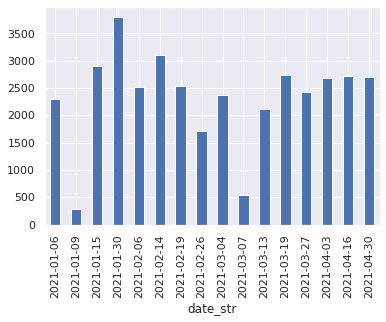

In [449]:
meat.groupby(by=['date_str'])['wprice'].sum().plot.bar()

Только свинина

<AxesSubplot:xlabel='date_str'>

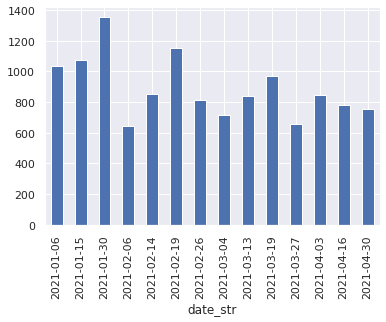

In [450]:
meat[meat.clr_name.str.contains('свин')].groupby(by=['date_str'])['wprice'].sum().plot.bar()

Только курица

<AxesSubplot:xlabel='date_str'>

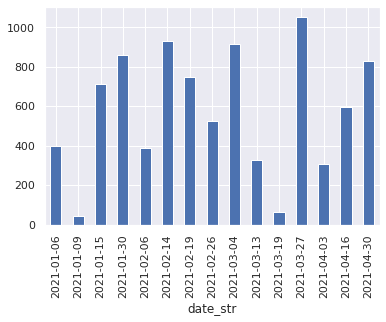

In [451]:

only_chiken = (meat.clr_name.str.contains('кур') | meat.clr_name.str.contains('бедро') | meat.clr_name.str.contains('груд')) & ~meat.clr_name.str.contains('инд')



meat[only_chiken].groupby(by=['date_str'])['wprice'].sum().plot.bar()

Только индейка

<AxesSubplot:xlabel='date_str'>

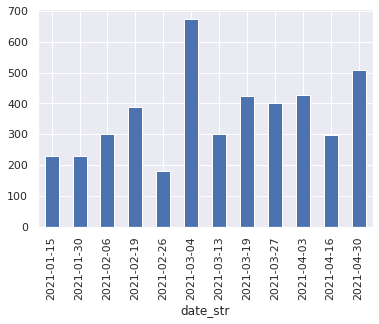

In [452]:

only_turk = meat.clr_name.str.contains('инд') 



meat[only_turk].groupby(by=['date_str'])['wprice'].sum().plot.bar()

Посмотрим общее распределение трат по категориям

In [453]:
sum_per_label = df[['label','wprice']].groupby('label').sum()

График расходов по долям

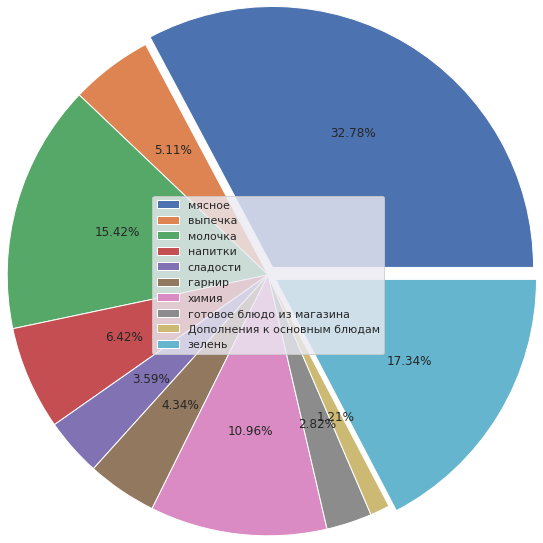

In [454]:
explode = [0.1,0,0,0,0,0,0,0,0,0.1]

plt.pie(
    sum_per_label.wprice,
    
    radius = 3,
    explode=explode,
    labeldistance =1.2,
    autopct = "%0.2f%%"
    )
plt.legend(labels=category_names,loc=10)



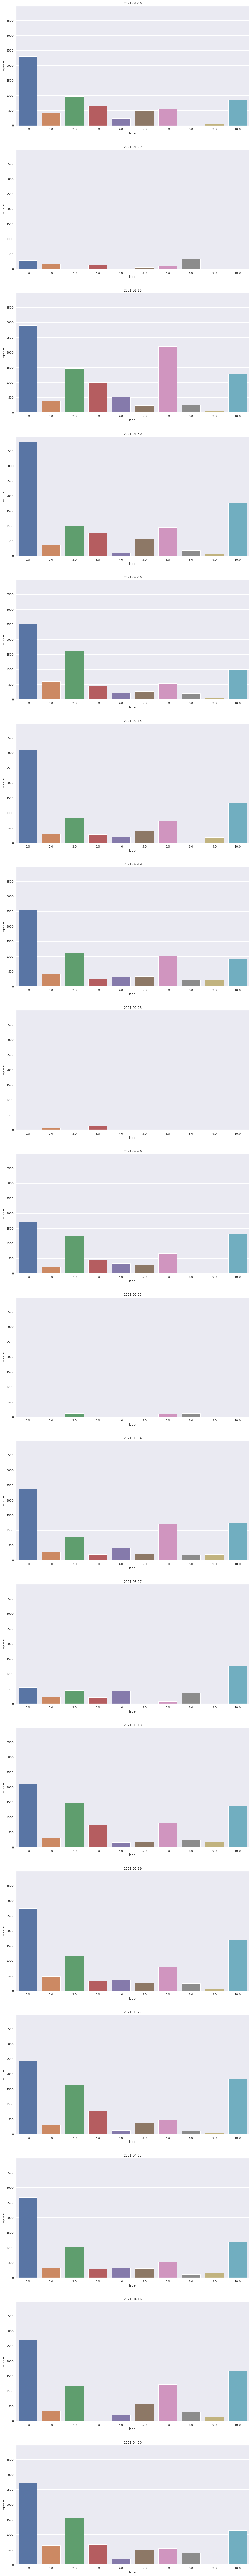

In [455]:
sum_per_label_date = df.groupby(['date_str','label'])['wprice'].sum().reset_index()
df.date.count()

dates = sum_per_label_date.date_str.unique()

f, axs = plt.subplots(
    dates.shape[0],
    1, 
    sharey=True, figsize=(16,dates.shape[0]*10)
    )

for i in range(dates.shape[0]):
    ax=axs[i]
    to_plot = sum_per_label_date[sum_per_label_date.date_str==dates[i]]
    sns.barplot(data=to_plot,x='label',y='wprice',ax=ax)
    ax.set_title(dates[i])


 посмотрим на зелень

<AxesSubplot:xlabel='date_str'>

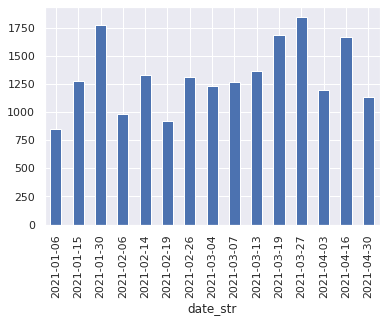

In [456]:
df[df.label==10].groupby(by=['date_str'])['wprice'].sum().plot.bar()

Посмотрим виды сыра, найдем любимый

In [457]:
milk = df[df.label==2]
cheese = milk[milk.clr_name.str.contains('сыр')]

In [458]:
cheese['cheese_name'] = cheese.clr_name.replace(r"\b(сыр|вес|%|в|г|гр)\b","",regex=True).str.strip()

В названии сыра смешаны раскладки, чтобы это исправить проведем замену  

In [459]:
cheese['cheese_name'] = cheese.cheese_name.str.replace(r"росcийский|российский","российский",regex=True)

In [460]:
cheese_name_stats = cheese.groupby('cheese_name')[['quantity','wprice']].aggregate({'wprice':['sum','count'],'quantity':['sum']})

In [461]:
top5 = cheese_name_stats.sort_values(by=[('wprice','count')],ascending=False)[:5].reset_index()

In [462]:
top5['mean'] = top5['wprice']['sum']/top5['quantity']['sum']

In [463]:
top5

cheese_name    wprice       quantity        mean
                     sum count      sum            
0  голландский  921.4532     5    1.968  468.218089
1   российский  704.2267     4    1.333  528.302101
2        гауда  286.3570     2    1.430  200.249650
3    ден д жар  313.9800     2    2.000  156.990000
4    тв кремол  129.9800     2    2.000   64.990000

Вывод: Было интересно посомтреть на себя со стороны через данные.  
Заметил,что давно не ел рыбу. Понял, что я мясоед. И какой сыр мой самый любимый.  
Цены на мясо остаются на одном и том же уровне в течении года. Больше всего стоит свинина.  
Цены на овощи выросли.  
Средний чек вырос примерно на 1000 рублей.